In [74]:
import cv2
import numpy as np
import skimage 
import matplotlib.pyplot as plt

# 1. Loading Image
download image from internet and then show it using below code

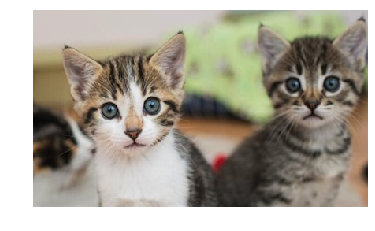

In [75]:
img = plt.imread('images/Cat/catster-kitten-rescue-HERO.jpeg')
plt.axis('off')
plt.imshow(img)

Opening with opencv

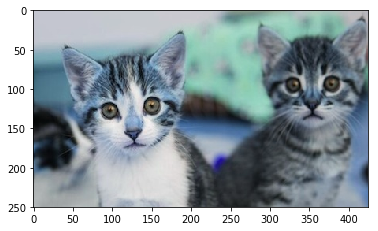

In [76]:
img_cv_bgr = cv2.imread('images/Cat/catster-kitten-rescue-HERO.jpeg')
#img_cv_rgb = cv2.cvtColor(img_cv_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_cv_bgr)

OpenCV use BGR format, so when u show opencv image using another library that use RGB format, the results will be different

#### Using Skimage

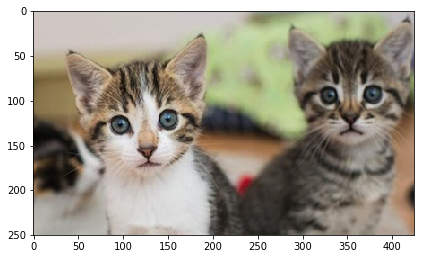

In [77]:
img_ski = skimage.io.imread('images/Cat/catster-kitten-rescue-HERO.jpeg')
skimage.io.imshow(img_ski)

### Converting RGB to Gray Scale

Manual Conversion

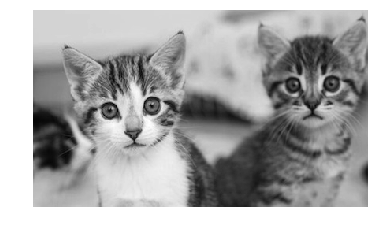

In [78]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

img_gray = rgb2gray(img)
plt.axis('off')
plt.imshow(img_gray,'gray')

Using Opencv Library

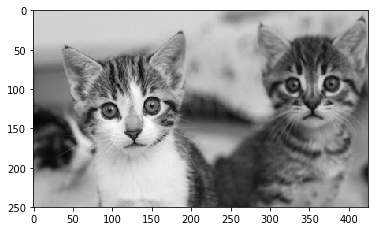

In [42]:
img_gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray2,'gray')

or <b>just load on grayscale format</b>

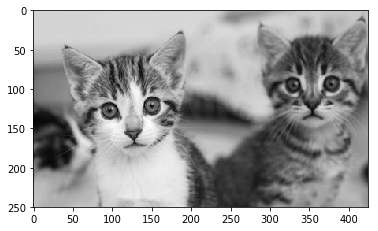

In [43]:
img_gray3= cv2.imread('images/Cat/catster-kitten-rescue-HERO.jpeg',0)
plt.imshow(img_gray3,'gray')

In [44]:
img_gray2.shape

(250, 425)

<b> Saving Image </b>

In [45]:
cv2.imwrite('images/Cat/imagesave_gray.jpg', img_gray2) 

True

### Drawing Line With OpenCV

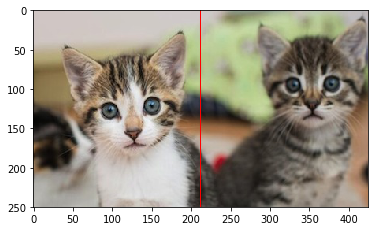

In [49]:
img_line = img.copy()
cv2.line(img_line, (int(img.shape[1]/2), 0), (int(img.shape[1]/2), img.shape[0]), (255, 0, 0), 1)
plt.imshow(img_line)

# 2. Image Processing

## 2.1 Segmentation: Thresholding


Thresholding Binary

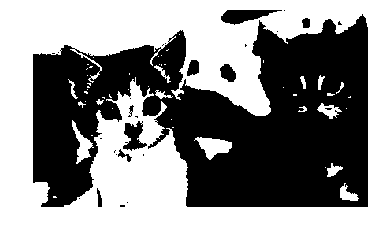

In [88]:
retval, threshold = cv2.threshold(img_gray, 170, 255, cv2.THRESH_BINARY)
plt.axis('off')
plt.imshow(threshold,'gray')


cv2.threshold comes with different mode:
- cv2.THRESH_BINARY
- cv2.THRESH_BINARY_INV
- cv2.THRESH_TRUNC
- cv2.THRESH_TOZERO
- cv2.THRESH_TOZERO_INV

Let's try it all

### Adaptive Thresholding

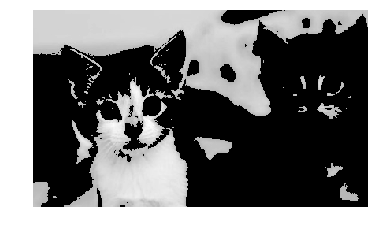

In [80]:
adapt1 = cv2.adaptiveThreshold(img_gray2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
plt.axis('off')
plt.imshow(threshold,'gray')

More Ref on Thresholding: https://docs.opencv.org/3.4.0/d7/d4d/tutorial_py_thresholding.html


## 2.2 OpenCV Convolution Filtering 

### Box Blurring

Using OpenCV blur library

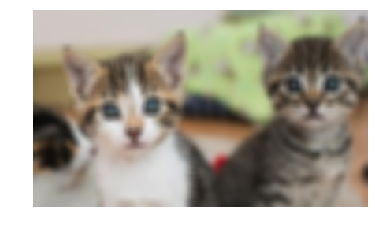

In [113]:
#using opencv built in blur
imgblur = cv2.blur(img,(10,10))
plt.figure()
plt.axis('off')
plt.imshow(imgblur)

### using opencv filter library

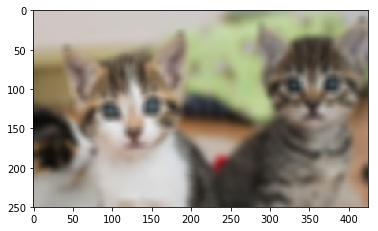

In [43]:
#using opencv filter library
kernel_size = 10
kernel = np.ones((kernel_size, kernel_size), dtype=np.float32)
kernel /= (kernel_size * kernel_size)
imgblur = cv2.filter2D(img, -1, kernel)   
plt.imshow(imgblur)

Question: What will happened if we increase the kernel size, what if we decrease it?

### Sharpening

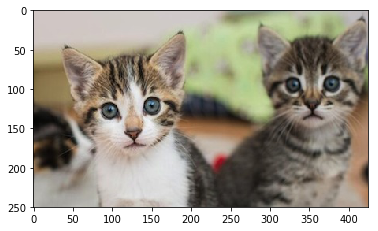

In [45]:
plt.imshow(img)

Sharpening

kernel [[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


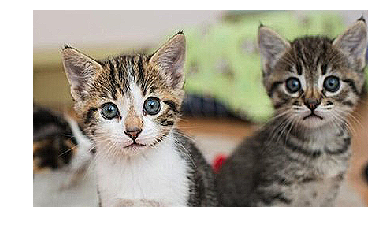

In [117]:
kernel_size = 3

kernel = np.zeros((kernel_size,kernel_size), dtype=np.float32)
kernel = np.array([[0,-1,0],
          [-1,5,-1],
          [0,-1,0]])

img_sharp2 = cv2.filter2D(img, -1, (kernel))
print ('kernel',kernel)
plt.axis('off')
plt.imshow(img_sharp2)

## Sobel Filter

kernel [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


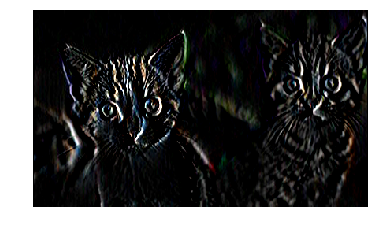

In [47]:
kernel_size = 3

kernel = np.zeros((kernel_size,kernel_size), dtype=np.float32)
kernel = np.array([[-1,0,1],
          [-2,0,2],
          [-1,0,1]])

img_edge_ver = cv2.filter2D(img, -1, (kernel))
print ('kernel',kernel)
plt.axis('off')
plt.imshow(img_edge_hor)

kernel [[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


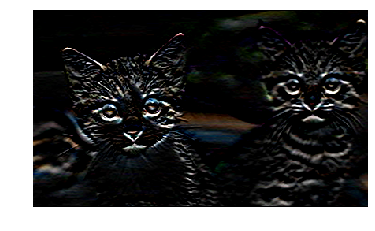

In [48]:
kernel_size = 3

kernel = np.zeros((kernel_size,kernel_size), dtype=np.float32)
kernel = np.array([[-1,-2,-1],
          [0,0,0],
          [1,2,1]])

img_edge_hor = cv2.filter2D(img, -1, (kernel))
print ('kernel',kernel)

plt.axis('off')
plt.imshow(img_edge_hor)

## Edge Detection

kernel [[ 0.   1.   0. ]
 [ 1.  -3.9  1. ]
 [ 0.   1.   0. ]]


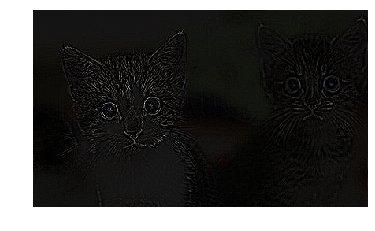

In [54]:
kernel_size = 3

kernel = np.zeros((kernel_size,kernel_size), dtype=np.float32)
kernel = np.array([[0, 1, 0],
                  [1, -3.9, 1],
                  [0, 1, 0 ]])

img_edge_hor = cv2.filter2D(img, -1, (kernel))
print ('kernel',kernel)

plt.axis('off')
plt.imshow(img_edge_hor)

In [ ]:
kernel_size = 3

kernel = np.zeros((kernel_size,kernel_size), dtype=np.float32)
kernel = np.array([[-1, -1, -1],
                  [-1, 8, -1],
                  [-1, -1, -1 ]])

img_edge_hor = cv2.filter2D(img, -1, (kernel))
print ('kernel',kernel)
plt.imshow(img_edge_hor)

## Gaussian Blurring

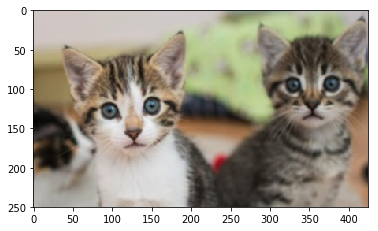

In [118]:
kernel_size = 3
kernel =  np.array([[1, 2, 1],
                  [2, 4, 2],
                  [1, 2, 1]])
kernel = kernel/16
img_blur_gaussian = cv2.filter2D(img, -1, kernel)   
plt.imshow(img_blur_gaussian)

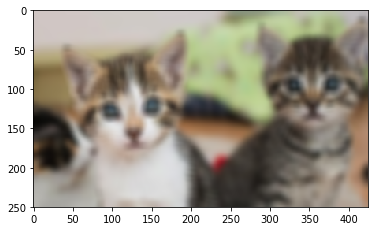

In [119]:
plt.imshow(imgblur)